# core

> Fill in a module description here

In [79]:
#| default_exp core

In [80]:
#| hide
from nbdev.showdoc import *

In [81]:
#| export
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff, integrate, parse_expr
import sympy
import numpy as np
import random
import math

In [82]:
#| export

class Free_market:
    def __init__(self, supply, demand) -> None:
        self.supply = supply
        self.demand = demand
        
    
    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)
    
    def get_graph(self, complete: bool = False) -> None:
        print("cannot multiply variables with zero")
        price = self.get_price()
        quantity = self.get_quantity()
        
        start = 0
        if "x" in self.demand:
            end = math.floor(self.get_zero_point(self.demand))#), 4 * math.floor(quantity))
        else:
            end = 1.5 * math.floor(quantity)
        step = 1 
        

        if "x" in self.supply:
            supply_dict = self.get_calculate_values(self.supply, end)
            supply_curve = sorted(list(supply_dict.values()) + [float(price)])
            supply_curve_domain = sorted(list(supply_dict.keys()) + [float(quantity)]) 
            supply_dict[quantity] = price


            #supply_curve_plot = plt.plot(supply_dict.keys(), supply_dict.values(), label = "Supply") 
            plt.plot(supply_dict.keys(), supply_dict.values(), label = "Supply") 
            
        else:
            supply_list = [float(price) for i in range(start, math.ceil(end), step)] + [float(price)]
            supply_curve = supply_list

            
            #supply_curve_plot = plt.plot(supply_curve, label = "Supply") 
            plt.plot(supply_curve, label = "Supply") 
            
        
        if "x" in self.demand:
            demand_dict = self.get_calculate_values(self.demand, end)
            demand_dict[quantity] =  price
            demand_curve = list(demand_dict.values()) + [float(price)]
            demand_curve_domain = sorted(list(demand_dict.keys()) + [float(quantity)]) 

            #demand_curve_plot = plt.plot(demand_dict.keys(),demand_dict.values(), label = "Demand") 
            plt.plot(demand_dict.keys(),demand_dict.values(), label = "Demand") 
            
        else:
            demand_list = [float(price) for i in range(start, math.ceil(end), step)]
            demand_curve = demand_list + [float(price)]
            #demand_curve_plot = plt.plot(demand_curve, label = "Demand") 
            plt.plot(demand_curve, label = "Demand") 
            

        plt.xlabel("Quantity")
        plt.ylabel("Price")
        
        if complete == True:
            
            x_range = [i for i in range(0, math.floor(quantity))] + [float(quantity)]
            if len(x_range) <= 1:
                x_range = [i for i in range(0, math.ceil(quantity))] + [float(quantity)]

            y_range = [i for i in range(0, math.floor(price))] + [float(price)]
            if len(y_range) <= 1:
                y_range = [i for i in range(0, math.ceil(price))] +[float(price)]


            price_curve = np.array([price for i in range(len(x_range))], dtype=float) 
            quantum_curve = np.array([quantity for i in range(len(y_range))], dtype=float) 
            
            plt.plot(x_range,                              # x [i for i in range(len(price_curve))],
                                            price_curve,                         # y
                                            linestyle = "dashed", label = f"Price*: {price}")
            
            plt.plot(quantum_curve,                             # x 
                                        y_range,                                   # y [i for i in range(len(quantum_curve))]
                                        linestyle = "dashed", label = f"Quantity*: {quantity}")
            
            

            if "x" in self.supply:
                price_curve = np.array(price_curve)
                supply_curve = np.array(supply_curve[0:len(price_curve) -1] + [float(price)])  

                x_range = np.array(x_range)

                # Create a valid boolean array for the 'where' condition
                condition = supply_curve[0:len(price_curve)]  <= price_curve

                demand_surplus_plot = plt.fill_between(x_range, supply_curve, price_curve, where = condition, color = "silver", alpha=0.9) # producer surplus

                x_mid = np.quantile(x_range, 0.2)
                y_mid = np.quantile([np.min(supply_curve[condition]), np.max(price_curve[condition])], 0.8)

                plt.text(x_mid, y_mid, "P.S")

            if "x" in self.demand:
                price_curve = np.array(price_curve)
                demand_curve = np.array(demand_curve[0:len(price_curve)  - 1] + [float(price)])  

                x_range = np.array(x_range)

                condition = demand_curve[0:len(price_curve)] >= price_curve

                consumer_surplus_plot = plt.fill_between(x_range, demand_curve, price_curve, where = condition, color = "purple", alpha=0.9) # consumer surplus

                x_mid = np.quantile(x_range, 0.2)
                y_mid = np.quantile([np.min(price_curve[condition]), np.max(demand_curve[condition])], 0.2)

                plt.text(x_mid, y_mid, "C.S")

        

        plt.legend()
        plt.show()


    def get_calculate_values(self, expression: str, end: int) -> dict:
        start = 0
        step = 1 

        quantity = end
        end = math.ceil(end)

        value_pairs = {}
        equation_function = self.create_equation_function(expression)

        
        if equation_function:
            #value_pairs[x_val] = result """
            if end <= 1:
                x_values = sorted([i for i in range(start, end, step)] + [quantity])

                for x_val in x_values:
                    result = float(equation_function(x_val))
                    value_pairs[x_val] = result
                result = float(equation_function(quantity))

                value_pairs[x_val] = result


            else:
                x_values = sorted([i for i in range(start, end, step)] + [quantity])
                for x_val in x_values:
                    result = float(equation_function(x_val))
                    value_pairs[x_val] = result
                
        else:
            print("Error: Unable to create the equation function.")
        return value_pairs    
    

    def create_equation_function(self, equation_str: str) -> str:
        x = symbols('x')
        
        try:
            equation = parse_expr(equation_str)
            equation_function = lambda x_val: equation.subs(x, x_val)
            return equation_function
        except Exception as e:
            return None


    def get_zero_point(self, expression: str) -> float:
        x = symbols('x')
        
        # Create the equation from the supply and demand functions
        equation = parse_expr(expression)
        
        # Calculate the equilibrium price and quantity
        solutions = solve(equation, x)
        if solutions:
            zero_point = solutions[0]
            return zero_point
        else:
            zero_point = self.get_price(self.supply, self.demand)
            return zero_point + round(0.1*zero_point, 0)
    
    
    def get_quantity(self) -> float:
        x = symbols('x')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(self.supply)
        demand_eq = parse_expr(self.demand)
        
        # Calculate the equilibrium price and quantity
        quantity = max(solve(Eq(supply_eq, demand_eq), x))

        return quantity
    

    def get_price(self) -> float:
        x, y = symbols('x y')
        quantity = self.get_quantity()
        
        if "x" in self.demand:
            end = self.get_zero_point(self.demand)
        else:
            end = 2 * quantity
        
        equation_function = self.create_equation_function(self.demand)
        
        
        if "x" not in self.supply:
            price = float(self.supply)
        elif "x" not in self.demand:
            price = float(self.demand)
        else:
            price = equation_function(quantity)
             
        return price


    def get_consumer_surplus(self) -> float:
        x, y = symbols('x y')
        
        
        # Calculate the equilibrium price and quantity
        price = self.get_price()
        quantity = self.get_quantity()
        
        # Define the inverse demand function (price as a function of quantity)
        consumer_surplus = parse_expr(f"{self.demand}-{price}")
        
        # Calculate consumer surplus
        surplus = sympy.integrate(consumer_surplus, (x, 0, quantity)) 
        
        return surplus
    

    def get_producer_surplus(self) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(self.supply)
        demand_eq = parse_expr(self.demand)
        
        # Calculate the equilibrium price and quantity
        price = self.get_price()
        quantity = self.get_quantity()
                
        
        #producer_surplus = parse_expr(f"{price}-{self.supply}")
        price_line = sympy.integrate(parse_expr(f"{price}"), (x, 0, quantity))
        supply_curve = sympy.integrate(parse_expr(self.supply), (x, 0, quantity))

        
            
        
        # Calculate consumer surplus
        surplus = price_line - supply_curve
        
        return surplus


    def get_economic_surplus(self) -> float:
        consumer = self.get_consumer_surplus()
        producer = self.get_producer_surplus()
        economic_surplus = consumer + producer
        return economic_surplus
    






In [83]:
#| export

class Monopoly(Free_market):
    def __init__(self, supply, demand) -> None:
        super().__init__(supply, demand)
            
    def get_graph(self,complete = False, is_tot_cost = False) -> None:
        x = symbols('x')
        income = parse_expr(self.demand) * x

        
        if is_tot_cost == True:
            supply_parsed = parse_expr(self.supply)
            marginal_cost = diff(supply_parsed, x)
        else:
            marginal_cost = self.supply
        
        marginal_revenue = diff(income, x)
        
        
        
        marginal_cost, marginal_revenue =str(marginal_cost), str(marginal_revenue)
        supply, demand =str(self.supply), str(self.demand)
        
        
        
        price = self.get_price()
        quantity = self.get_quantity()
        end = self.get_zero_point(marginal_revenue)

        mc = self.get_calculate_values(marginal_cost, end)
        mr = self.get_calculate_values(marginal_revenue, end)

        supply_dict = self.get_calculate_values(supply, end)
        demand_dict = self.get_calculate_values(demand, end)

        if complete == True:
            plt.plot([i for i in range(0, round(quantity) + 1)], [price for i in range(0, round(quantity) + 1)],
                     linestyle = "dashed", label = f"Price*: {price}")
            plt.plot([quantity for i in range(0, round(price) + 1 )], [i for i in range(0,round(price) + 1)],
                     linestyle = "dashed", label = f"Quantity*: {quantity}")
            
        plt.plot(mc.keys(),mc.values(), label = "Marginal Cost") 
        plt.plot(mr.keys(),mr.values(), label = "Marginal Revenue") 

        plt.plot(supply_dict.keys(), supply_dict.values(), label = "Supply")
        plt.plot(demand_dict.keys(), demand_dict.values(), label = "Demand")

        

        plt.xlabel("Quantity")
        plt.ylabel("Price")

        plt.legend() 
        plt.show()

In [84]:
#| export


supply_function = f"{1} + {1}*x"
demand_function = f"{10} - {1}*x"
market = Free_market(supply_function, demand_function)

print(f"supply function {supply_function}\ndemand function {demand_function}")

supply function 1 + 1*x
demand function 10 - 1*x


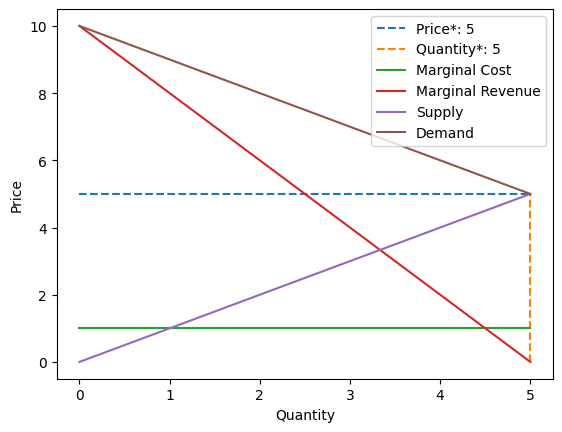

In [85]:
#| export
#from monopoly import Monopoly

supply = "x"
demand = "10 -  x"
market = Monopoly(supply, demand)
market.get_graph(complete=True, is_tot_cost = True)

In [86]:
supply_function = " x*2"
demand_function = "1000 -  6*x"
market = Free_market(supply_function, demand_function)

In [87]:

consumer_surplus = market.get_consumer_surplus()
print("Consumer Surplus:", consumer_surplus)

producer_surplus = market.get_producer_surplus()
print("Producer Surplus:", producer_surplus)

economic_surplus = market.get_economic_surplus()

print("Economic Surplus:", economic_surplus)

Consumer Surplus: 46875
Producer Surplus: 15625
Economic Surplus: 62500


cannot multiply variables with zero


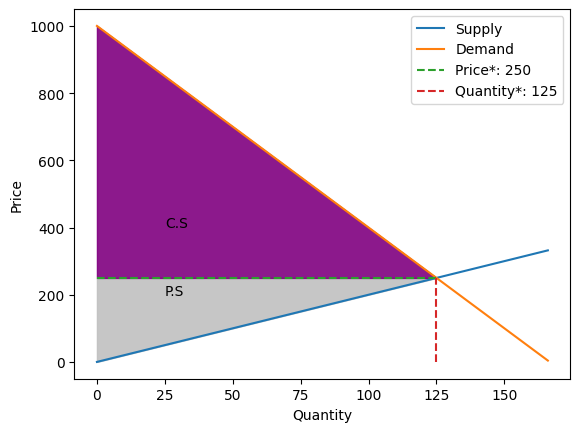

In [88]:
market.get_graph(complete=True)

In [89]:
price = market.get_price()
quantity = market.get_quantity()
print(f"Price: {price}, Quantity: {quantity}")

Price: 250, Quantity: 125


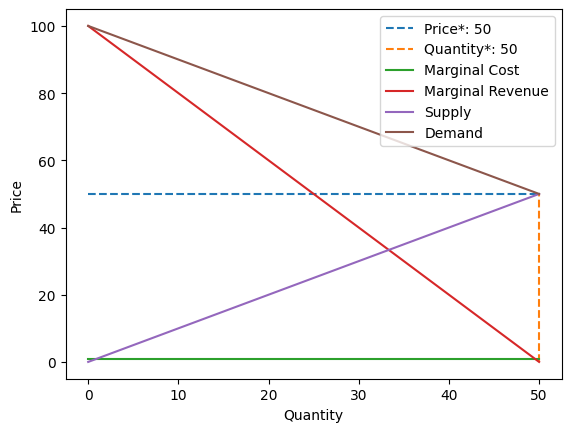

In [90]:

supply = "x"
demand = "100 - x"

market = Monopoly(supply, demand)

market.get_graph(complete=True, is_tot_cost = True)

In [91]:
#| hide
import nbdev; nbdev.nbdev_export()